In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Identifying Real Estate Opportunities Using Maschine Learning

Authors: Alejandro Baldominos, Iván Blanco, Antonio José Moreno, Rubén Iturrarte, Óscar Bernárdez and Carlos Afonso

https://arxiv.org/pdf/1809.04933

Published: 21 November 2018

## 1. Introduction
The article examines the challenges and investment opportunities in the real estate market, which is subject to significant price fluctuations due to various variables, some of which are unknown or uncontrollable. Housing prices can rapidly increase or decrease, yet online listings for sale or rent are often not updated in a timely manner. Some sellers may be unaware of the current market value of their property or may intentionally underprice it to sell faster. The study aims to develop a machine learning application that identifies, in real-time, houses listed at a significantly lower price than the market value, which could be useful for investors. The research focuses on the Salamanca district in Madrid, Spain, using data from the online platform Idealista. The application is based on a regression model that estimates the market price of a property based on features extracted from public listings. To achieve high predictive accuracy, a feature engineering stage was conducted to identify relevant characteristics. Several machine learning algorithms were tested, including regression trees, k-nearest neighbors, support vector machines, and neural networks, with the advantages and disadvantages of each method highlighted.

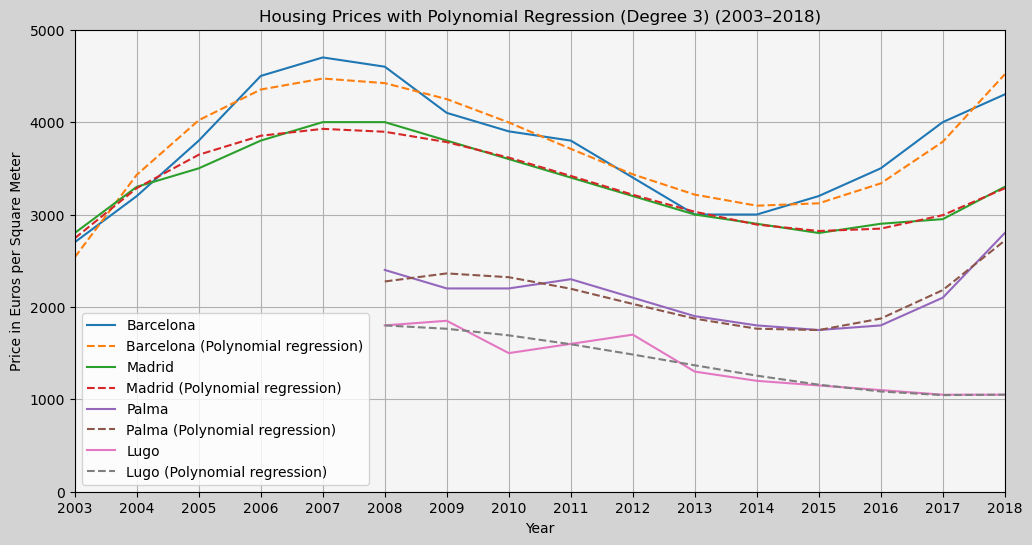

In [2]:
years = list(range(2003, 2019))
barcelona_prices = [2700, 3200, 3800, 4500, 4700, 4600, 4100, 3900, 3800, 3400, 3000, 3000, 3200, 3500, 4000, 4300]
madrid_prices = [2800, 3300, 3500, 3800, 4000, 4000, 3800, 3600, 3400, 3200, 3000, 2900, 2800, 2900, 2950, 3300]

years_partial = list(range(2008, 2019))
palma_prices_partial = [2400, 2200, 2200, 2300, 2100, 1900, 1800, 1750, 1800, 2100, 2800]
lugo_prices_partial = [1800, 1850, 1500, 1600, 1700, 1300, 1200, 1150, 1100, 1050, 1050]

years_array = np.array(years).reshape(-1, 1)
years_partial_array = np.array(years_partial).reshape(-1, 1)

degree = 3

poly_models = {
    "Barcelona": make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(years_array, barcelona_prices),
    "Madrid": make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(years_array, madrid_prices),
    "Palma": make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(years_partial_array, palma_prices_partial),
    "Lugo": make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(years_partial_array, lugo_prices_partial)
}

plt.figure(figsize=(12, 6), facecolor='lightgrey')
ax = plt.gca()
ax.set_facecolor('whitesmoke')

for city, prices in zip(["Barcelona", "Madrid"], [barcelona_prices, madrid_prices]):
    plt.plot(years, prices, label=city)
    predicted_prices = poly_models[city].predict(years_array)
    plt.plot(years, predicted_prices, linestyle='--', label=f'{city} (Polynomial regression)')

for city, prices, model in zip(["Palma", "Lugo"], 
                               [palma_prices_partial, lugo_prices_partial], 
                               [poly_models["Palma"], poly_models["Lugo"]]):
    plt.plot(years_partial, prices, label=city)
    predicted_prices = model.predict(years_partial_array)
    plt.plot(years_partial, predicted_prices, linestyle='--', label=f'{city} (Polynomial regression)')

plt.title("Housing Prices with Polynomial Regression (Degree 3) (2003–2018)")
plt.xlabel("Year")
plt.ylabel("Price in Euros per Square Meter")
plt.legend()
plt.grid(True)

plt.xticks(years)
plt.yticks(range(0, 5001, 1000))
plt.ylim(0, 5000)
plt.xlim(2003, 2018)

plt.show()

## 2. State of the Art
Traditional property valuation models rely on hedonic regression, which analyzes the relationships between property characteristics and its price. For example, studies by Jiang et al. on properties in Singapore use this method, taking into account location, property type, and ownership type. Other studies utilize search indices and news for market condition assessment, such as the model by Greenstein et al., which uses Google Trends data to predict the U.S. housing market. A similar study was conducted by Sun et al., who combined search engine and news data to predict property price indices in China. Some models rely on fuzzy logic for property valuation, using techniques like the Adaptive Neuro-Fuzzy Inference System (ANFIS), which has shown better results than simple regression. Additionally, other researchers employ fuzzy logic to handle uncertain information, for example, in the purchase of office buildings (del Giudice et al.). In various studies, machine learning techniques are applied, such as Boltzmann machines to assess the feasibility of starting construction and RIPPER to determine whether investing in a property is profitable (Park and Kwon Bae). Further, studies by Manganelli and del Giudice demonstrate successful applications of linear programming and genetic algorithms for property price estimation. Current literature on machine learning for real estate valuation is limited and often restricted to specific locations and a small set of techniques. The present work focuses on a real market segment over six months, employing a broader range of machine learning methods and approaching the problem as a regression task.

## 3. Data
The dataset used in this study focuses on high-end properties located in the Salamanca district of Madrid, Spain. The data is sourced from the Idealista platform and covers the second half of 2017, including only properties priced over one million euros. Salamanca is one of the wealthiest and most expensive areas in Madrid, known for its prime residential properties. The dataset is divided into three main categories of features: location, property characteristics, and listing characteristics.

#### Location-related features:
Zone: the part of Salamanca where the property is located.
Postal code, Street name, Street number, Floor number.

#### Property characteristics:
Property type (apartment or villa).
Constructed area and Floor area (in square meters).
Year of construction.
Number of rooms and Number of bathrooms.
Other attributes such as whether it is a penthouse, duplex, if it has an elevator, storage room, swimming pool, garden, parking space (and its price if separate), as well as monthly community costs.

#### Listing characteristics:
Activation date and Deactivation date of the listing.
Property price (current or at deactivation, which is usually the final sale or rental price).

Some features may be missing because the seller may not have provided specific information, such as whether there is an elevator or community costs, or they may have hidden the exact address to maintain privacy.

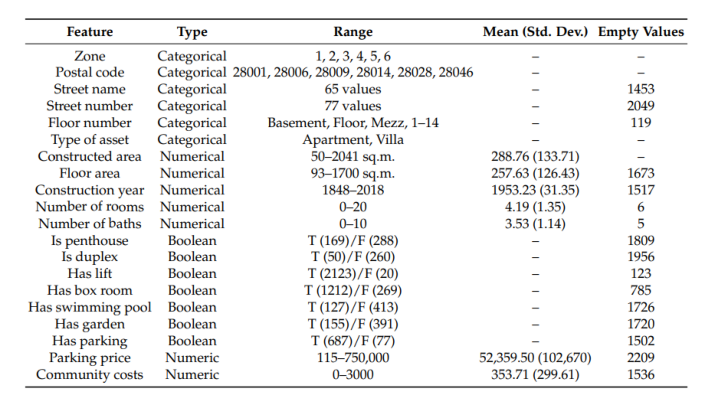

In [3]:
img = mpimg.imread('images/tbl1.png')

plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

### 3.2. Data Cleansing
Before analysis, data cleaning was conducted. Although the data was relatively clean, some fields, like street names, had inconsistencies due to varying spellings. To standardize this information, street names were manually corrected. For properties without a specified floor area, it was assumed to be equal to the constructed area, which is an acceptable approximation. All binary attributes (such as the presence of a pool or an elevator) were treated such that missing values were assumed to indicate the absence of that feature. This assumption is based on the practice that sellers typically only note a feature when it is available.

### 3.3. Exploratory Data Analysis
Before training the models, exploratory data analysis was performed to determine the impact of various variables on property prices. A correlation matrix was calculated, showing that property area, the number of bedrooms, and the number of bathrooms have the greatest influence on price, with strong correlations between these variables. Interestingly, most binary features and the year of construction do not have a significant correlation with price. An analysis of prices by zone reveals that properties in zone 1 have higher average prices than those in other zones, suggesting that location also affects price. However, the distribution of constructed areas by zone shows that in zone 4, the median area is larger, yet prices are similar to those in other zones, underscoring the importance of location beyond just area. Linear and polynomial regressions on prices relative to constructed area were also performed, but the results indicate that area alone is insufficient for accurate price prediction. Even higher-order regression models did not significantly improve accuracy, suggesting the need for more complex models and a broader set of features.

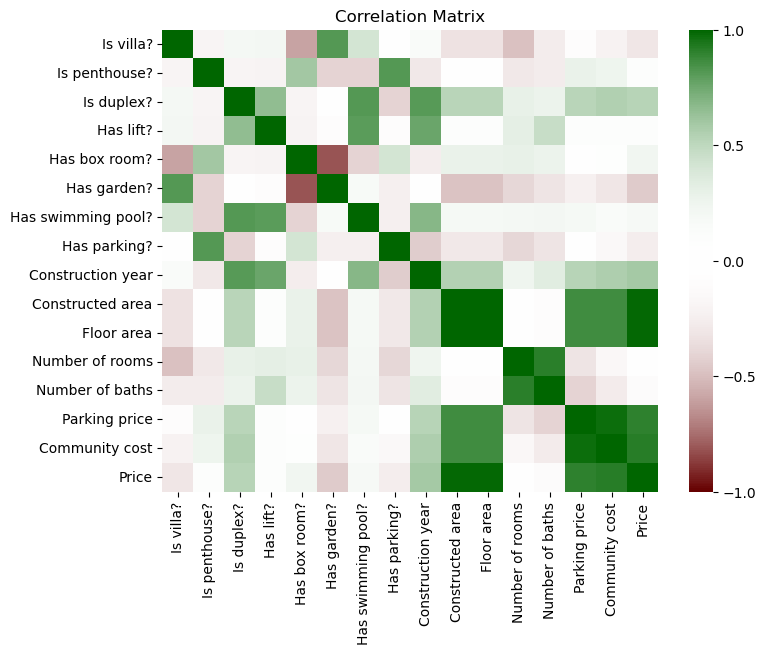

In [4]:
data_dict = {
    'Is villa?': [1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
    'Is penthouse?': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'Is duplex?': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Has lift?': [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    'Has box room?': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    'Has garden?': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    'Has swimming pool?': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Has parking?': [1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    'Construction year': [2005, 2010, 2015, 2016, 2000, 2018, 2004, 2012, 2008, 2003],
    'Constructed area': [150, 200, 250, 300, 180, 220, 270, 230, 210, 190],
    'Floor area': [140, 190, 240, 290, 170, 210, 260, 220, 200, 180],
    'Number of rooms': [4, 5, 3, 6, 4, 5, 3, 4, 6, 5],
    'Number of baths': [2, 3, 1, 3, 2, 3, 1, 2, 3, 2],
    'Parking price': [15000, 20000, 30000, 25000, 18000, 22000, 27000, 23000, 21000, 19000],
    'Community cost': [300, 400, 500, 450, 350, 420, 470, 430, 410, 390],
    'Price': [1500000, 1600000, 1700000, 1750000, 1550000, 1650000, 1720000, 1630000, 1610000, 1580000]
}

data = pd.DataFrame(data_dict)

correlation_matrix = data.corr()

colors = [(0.4, 0, 0, 1), (1, 1, 1, 0), (0, 0.4, 0, 1)]
cmap = LinearSegmentedColormap.from_list("red_transparent_green", colors)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap=cmap, vmin=-1, vmax=1, 
            cbar_kws={'ticks': [-1, -0.5, 0, 0.5, 1]})
plt.title("Correlation Matrix")
plt.show()

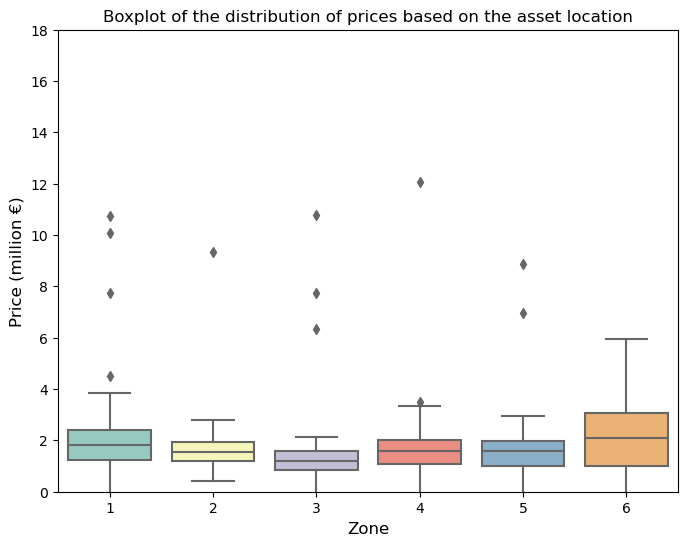

In [5]:
np.random.seed(100000)
data = {
    'Zone': np.repeat([1, 2, 3, 4, 5, 6], 100),
    'Price (million €)': np.concatenate([
        np.random.normal(1.8, 1, 100),
        np.random.normal(1.5, 0.5, 100),
        np.random.normal(1.2, 0.5, 100),
        np.random.normal(1.5, 0.7, 100),
        np.random.normal(1.5, 0.7, 100),
        np.random.normal(2, 1.5, 100)
    ])
}

df = pd.DataFrame(data)

df.loc[np.random.choice(df.index, 10), 'Price (million €)'] += np.random.uniform(5, 10, 10)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Zone', y='Price (million €)', data=df, palette="Set3")
plt.ylim(0, 18)
plt.ylabel("Price (million €)", fontsize=12)
plt.xlabel("Zone", fontsize=12)
plt.title("Boxplot of the distribution of prices based on the asset location")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


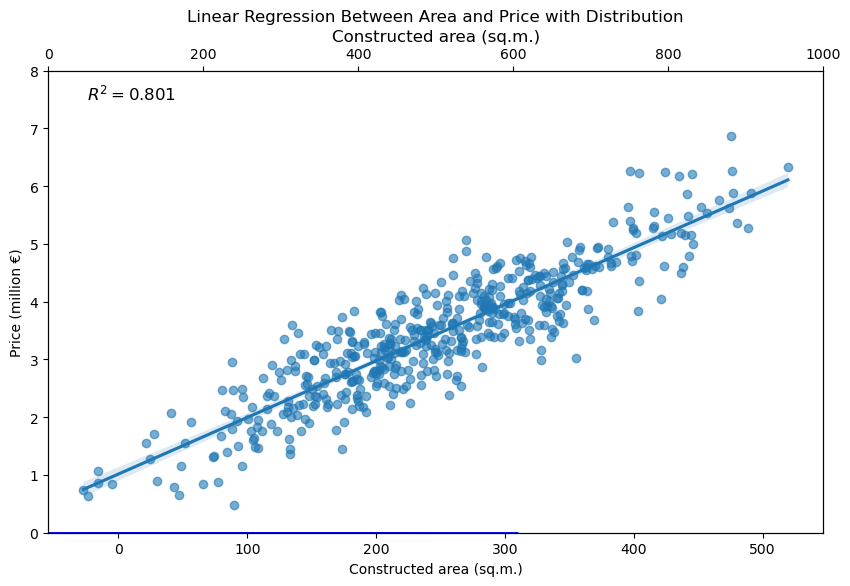

In [6]:
np.random.seed(0)
constructed_area = np.random.normal(250, 100, 500)
price = constructed_area * 0.01 + np.random.normal(1, 0.5, 500)

df = pd.DataFrame({
    'Constructed area (sq.m.)': constructed_area,
    'Price (million €)': price
})

X = df[['Constructed area (sq.m.)']]
y = df['Price (million €)']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

plt.figure(figsize=(10, 6))
sns.regplot(x='Constructed area (sq.m.)', y='Price (million €)', data=df, scatter_kws={'alpha':0.6})
sns.kdeplot(df['Constructed area (sq.m.)'], ax=plt.gca().twiny(), color='b', fill=True)

plt.text(50, 7.5, f'$R^2 = {r2:.3f}$', fontsize=12)

plt.xlim(0, 1000)
plt.ylim(0, 8)
plt.xlabel("Constructed area (sq.m.)", fontsize=12)
plt.ylabel("Price (million €)", fontsize=12)
plt.title("Linear Regression Between Area and Price with Distribution")
plt.show()

## 4. Machine Learning Proposal
The authors propose using more complex models to predict property prices, building on previous analyses that showed property area as a significant but insufficient factor for accurate price prediction. The problem is approached as a multivariate regression task, where the target is the price, and the property features include binary (e.g., presence of a pool), categorical (e.g., location), and continuous variables (e.g., constructed area). One-hot encoding is used to process categorical features, while various strategies are applied to handle incomplete data, such as excluding unreliable attributes (e.g., street number).

#### Support Vector Regression (SVR):
A method that transforms data into a higher-dimensional space using kernel functions to improve prediction accuracy.

#### k-Nearest Neighbors (k-NN):
This method finds the closest examples in the training set based on distance and uses their average value for prediction.

#### Ensembles of Regression Trees:
Multiple trees are used to reduce bias in regression, applying the “extremely randomized trees” technique for improved accuracy.

#### Multi-layer Perceptron Network:
A neural network with multiple layers that uses backpropagation for training and can model complex nonlinear relationships.

Each algorithm has key parameters that influence performance, and in the experimental section, different values for these parameters will be tested to achieve optimal accuracy.

## 5. Evaluation
#### 5.1. Experimental Setup
For evaluating the four machine learning models, parameters were configured for each algorithm: for example, kernel type for Support Vector Regression (SVR), the number of neighbors and distance metric for k-Nearest Neighbors (k-NN), the number of trees and split criteria for ensembles of regression trees, and layer architecture for the Multi-Layer Perceptron (MLP). Data normalization was applied to observe its impact on model performance. Five-fold cross-validation was used, and the total number of experiments conducted was 4,670.

#### 5.2. Results and Analysis
The ensembles of regression trees performed the best in terms of Mean Absolute Error (MAE), with a minimum MAE of 338,715 euros (a relative error of 16.80%) and a Median Absolute Error (MedAE) of 94,850 euros (5.71%). The k-NN and SVR models followed in accuracy, while MLP showed higher variability and a tendency towards overfitting.

Explained variance regression score, which measures the extent to which a model accounts for
the variation of a dataset. Letting yˆ be the predicted output and y the actual output, this metric is
computed as follows in Equation (1):

$$
E_{\text{var}} (y, \hat{y}) = 1 - \frac{\operatorname{Var} \{y - \hat{y}\}}{\operatorname{Var} \{y\}}. 
$$

Mean absolute error, which computes the average of the error for all the instances, computed as follows in Equation (2):

$$ 
MAE(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n} |y_i - \hat{y}_i|. 
$$

Median absolute error, similar to the previous score but computing the median of the distribution of differences between the expected and actual values, as shown in Equation (3):

$$ 
\text{MedAE}(y, \hat{y}) = \operatorname{median} (|y_1 - \hat{y}_1|, \dots, |y_n - \hat{y}_n|). $$

Mean squared error, similar to MAE but with all errors squared, and therefore computed asdescribed in Equation (4):

$$ 
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2.
$$

Coefficient of determination
), which provides a measure of how well future samples are like y
to be predicted. It is computed using Equation (5):

$$
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2.2.
$$

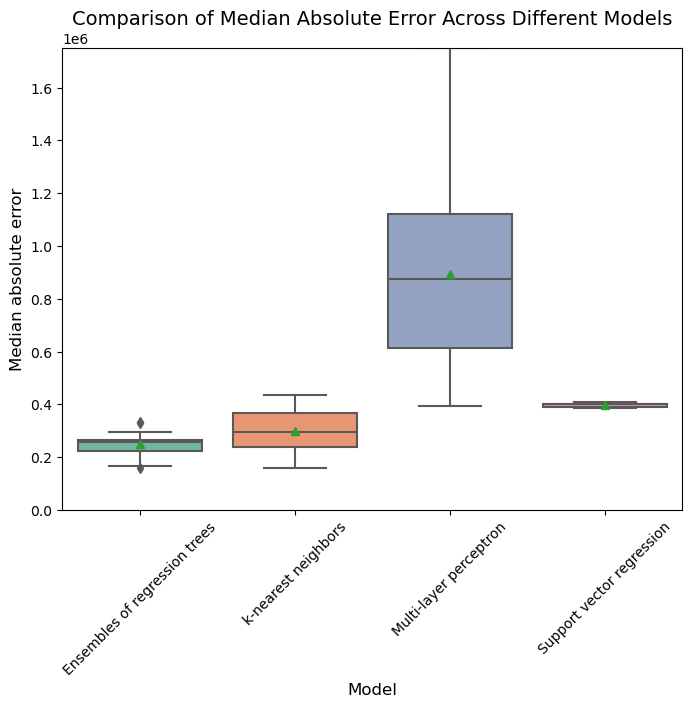

In [7]:
data = {
    'Model': ['Ensembles of regression trees'] * 20 + ['k-nearest neighbors'] * 20 + 
             ['Multi-layer perceptron'] * 20 + ['Support vector regression'] * 20,
    'Median absolute error': (
        list(abs(250000 + 50000 * np.random.randn(20))) +
        list(abs(300000 + 80000 * np.random.randn(20))) +
        list(abs(800000 + 300000 * np.random.randn(20))) +
        list(abs(400000 + 10000 * np.random.randn(20)))
    )
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Median absolute error', data=df, palette="Set2", showfliers=True, showmeans=True)
plt.ylim(0, 1750000)
plt.ylabel("Median absolute error", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Comparison of Median Absolute Error Across Different Models", fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### 5.3 Configuration
The ensembles of regression trees are minimally affected by the number of trees, but the use of bootstrap samples worsens performance. For k-NN, a higher number of neighbors increases error, with models performing best when fewer neighbors are used. In MLP, architecture has a significant impact, with more layers containing fewer neurons leading to poorer performance.

#### 5.4 Normalization
Data normalization does not affect the ensembles of trees, k-NN, or SVR. However, for MLP, normalization increases error, which contradicts usual expectations but was not deeply analyzed in this study.

#### 5.5 Model Training and Prediction Time
For k-NN, training time is minimal, but prediction time is considerably longer. SVR is relatively quick for training but requires more time for prediction. Ensembles of trees and MLP have significant training and prediction times, with MLP’s time decreasing as more layers with fewer neurons are added.

Ensembles of trees are the best choice for property price prediction, due to their high accuracy and stability, followed by k-NN and SVR.

## 6. Conclusion
The real estate market offers significant investment opportunities due to the numerous factors influencing property prices. This study employs machine learning to predict property prices and identify investment opportunities. Experiments were conducted with various models: ensembles of regression trees, k-nearest neighbors, support vector regression, and multi-layer perceptrons, with ensembles of trees achieving the best results. The lowest mean and median absolute errors were 338,715 euros and 94,850 euros, respectively, representing relative errors of 16.80% and 5.71%. This is significantly more accurate than classical linear regression, highlighting the advantage of more complex models. The high mean error is attributed to outliers, with the most expensive property priced at 90 million euros, suggesting a potential data error. The study offers several directions for future work: analyzing the k-NN model with fewer than five neighbors, further examining the impact of normalization on the multi-layer perceptron, and using deep learning to analyze textual descriptions in listings. Another potential direction is using classification methods for market segmentation and analyzing investment opportunities as a binary classification task.

#### Data Statement
The data used in this study was provided by Idealista and includes real estate sales in the Salamanca district of Madrid during the second half of 2017. Due to a confidentiality agreement, the data cannot be made publicly available. For reproducing the results, the authors recommend contacting Idealista.

## References
1. Teuben, B.; Bothra, H. Real Estate Market Size 2017—Annual Update on the Size of the Professionally Managed
Global Real Estate Investment Market; Technical Report; MSCI, Inc.: New York City, NY, USA, 2018. Available
online: https://www.msci.com/documents/10199/6fdca931-3405-1073-e7fa-1672aa66f4c2 (accessed on 20
November 2018).
2. Idealista. Índice Idealista 50: Evolución del Precio de la Vivienda de Segunda Mano en España, 2018.
Available online: https://www.idealista.com/news/estadisticas/indicevivienda#precio (accessed on 20
November 2018).
3. Jiang, L.; Phillips, P.C.B.; Yu, J. A New Hedonic Regression for Real Estate Prices Applied to the Singapore
Residential Market. Technical Report, Cowles Foundation Discussion Paper No. 1969, 2014. Available
online: https://ssrn.com/abstract=2533017 (accessed on 20 November 2018).
4. Jiang, L.; Phillips, P.C.; Yu, J. New Methodology for Constructing Real Estate Price Indices Applied to the
Singapore Residential Market. J. Bank. Financ. 2015, 61, S121–S131.
5. Greenstein, S.M.; Tucker, C.E.; Wu, L.; Brynjolfsson, E. The Future of Prediction : How Google Searches
Foreshadow Housing Prices and Sales The Future of Prediction How Google Searches Foreshadow Housing
Prices. In Economic Analysis of the Digital Economy; The University of Chicago Press: Chicago, IL, USA, 2015;
pp. 89–118.
6. Sun, D.; Du, Y.; Xu, W.; Zuo, M.; Zhang, C.; Zhou, J. Combining Online News Articles and Web Search to
Predict the Fluctuation of Real Estate Market in Big Data Context. Pac. Asia J. Assoc. Inf. Syst. 2015, 6, 19–37.
7. Zurada, J.; Levitan, A.; Juan, G. Non-Conventional Approaches to Property Vale Assessment. J. Appl. Bus.
Res. 2016, 22, 1–14.
8. Guan, J.; Shi, D.; Zurada, J.M.; Levitan, A.S. Analyzing Massive Data Sets: An Adaptive Fuzzy Neural
Approach for Prediction, with a Real Estate Illustration. J. Organ. Comput. Electron. Commer. 2014, 24, 94–112.
9. Sarip, A.G.; Hafez, M.B.; Nasir Daud, M. Application of Fuzzy Regression Model for Real Estate Price
Prediction. Malays. J. Comput. Sci. 2016, 29, 15–27.
10. Del Giudice, V.; De Paola, P.; Cantisani, G. Valuation of Real Estate Investments through Fuzzy Logic.
Buildings 2017, 7, 26.
11. Rafiei, M.H.; Adeli, H. A Novel Machine Learning Model for Estimation of Sale Prices of Real Estate Units.
J. Construct. Eng. Manag. 2016, 142, 04015066.
12. Park, B.; Kwon Bae, J. Using Machine Learning Algorithms for Housing Price Prediction: The Case of Fairfax
County, Virginia Housing Data. Expert Syst. Appl. 2015, 42, 2928–2934.
13. Manganelli, B.; Paola, P.D.; Giudice, V.D. Linear Programming in a Multi-Criteria Model for Real Estate
Appraisal. In Proceedings of the International Conference on Computational Science and its Applications,
Part I, Salamanca, Spain, 12–16 November 2007; Volume 9786, pp. 182–192.
14. Del Giudice, V.; De Paola, P.; Forte, F. Using Genetic Algorithms for Real Estate Appraisals. Buildings 2017, 7, 31.
15. Del Giudice, V.; De Paola, P.; Forte, F.; Manganelli, B. Real Estate appraisals with Bayesian approach
and Markov Chain Hybrid Monte Carlo Method: An Application to a Central Urban Area of Naples.
Sustainability 2017, 9, 2138.
16. White, H. A Heteroskedasticity-Consistent Covariance Matrix Estimator and a Direct Test for Heteroskedasticity.
Econometrica 1980, 48, 817–838.
Appl. Sci. 2018, 8, 2321 24 of 24
17. MacKinnon, J.G.; White, H. Some heteroskedasticity-consistent covariance matrix estimators with improved
finite sample properties. J. Econom. 1985, 29, 305–325.
18. Frank, E.; Trigg, L.; Holmes, G.; Witten, I.H. Technical Note: Naive Bayes for Regression. Mach. Learn.
2000, 41, 5–25.
19. Smola, A.J.; Schölkopf, B. A Tutorial on Support Vector Regression. Stat. Comput. 2004, 14, 199–222.
20. Geurts, P.; Ernst, D.; Wehenkel, L. Extremely Randomized Trees. Mach. Learn. 2006, 63, 3–42.
21. Pedregosa, F.; Varoquaux, G.; Gramfort, A.; Michel, V.; Thirion, B.; Grisel, O.; Blondel, M.; Prettenhofer,
P.; Weiss, R.; Dubourg, V.; Vanderplas, J.; Passos, A.; Cournapeau, D.; Brucher, M.; Perrot, M.; Édouard
Duchesnay. Scikit-learn: Machine Learning in Python. J. Mach. Learn. Res. 2011, 12, 2825–2830.
22. Liu, W.; Wang, Z.; Liu, X.; Zeng, N.; Liu, Y.; Alsaadi, F. A Survey of Deep Neural Network Architectures and
their Applications. Neurocomputing 2017, 243, 11–26.
23. Kleine-Deters, J.; Zalakeviciute, R.; Gonzalez, M.; Rybarczyk, Y. Modeling PM2.5 Urban Pollution Using
Machine Learning and Selected Meteorological Parameters. J. Electr. Comput. Eng. 2017, 2017, 5106045.